In [1]:
# Import dependencies
from config import weather_api_key
from scipy.stats import linregress
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import requests
import time

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [9]:
# Display the latitude and longitude combinations
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    country = citipy.nearest_city(coord[0], coord[1]).country_code
    print(city, country)

NameError: name 'coordinates' is not defined

In [7]:
# Create a list to hold the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name

    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [8]:
# Create a URL for Weather Map API Call
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key + '&q='
url

'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b0a06142b8c6c728f38f5539f9d75362&q='

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print('Beginning Data Retrieval')
print('-----------------------------')

# Initalize counters
record_count = 1
set_count = 1

# Loop through all the cities
for i, city in enumerate(cities):
    
    # Group the cities in sets of 50 for logging purposes
    if (i % 50 == 0) and (i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL for each city
    city_url = url + city.replace(' ', '+')
    
    # Log the URL, record, set numbers, and city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Increment the record count
    record_count += 1

    # Run an  API request for each city
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Add the city information to city_data
        city_data.append({
            'City': city.title(),
            'Lat': city_lat,
            'Lng': city_lng,
            'Max Temp': city_max_temp,
            'Humidity': city_humidity,
            'Cloudiness': city_clouds,
            'Wind Speed': city_wind,
            'Country': city_country,
            'Date': city_date
        })
    # If an error is experienced, skip the city
    except: 
        print('City not found. Skipping...')
        pass
    
# Indicate that the data loading is complete
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 4 of Set 1 | nyurba
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | yima
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | phangnga
Processing Record 13 of Set 1 | excelsior springs
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | noumea
Processing Record 21 of Set 1 | hobart
Processing 

Processing Record 39 of Set 4 | ahipara
Processing Record 40 of Set 4 | godo
Processing Record 41 of Set 4 | tahe
Processing Record 42 of Set 4 | tigil
Processing Record 43 of Set 4 | chabahar
Processing Record 44 of Set 4 | mahalingpur
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | tabou
Processing Record 47 of Set 4 | tuktoyaktuk
Processing Record 48 of Set 4 | panaba
Processing Record 49 of Set 4 | sulphur
Processing Record 50 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 1 of Set 5 | teguise
Processing Record 2 of Set 5 | biograd na moru
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | nikolskoye
Processing Record 5 of Set 5 | lujan
Processing Record 6 of Set 5 | zapolyarnyy
Processing Record 7 of Set 5 | shakawe
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | aksarka
Processing Record 10 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 5 | emerald
Processing Record 

Processing Record 29 of Set 8 | jieshi
Processing Record 30 of Set 8 | bathsheba
Processing Record 31 of Set 8 | faanui
Processing Record 32 of Set 8 | saint-francois
Processing Record 33 of Set 8 | samana
Processing Record 34 of Set 8 | pangai
Processing Record 35 of Set 8 | meadow lake
Processing Record 36 of Set 8 | ngorongoro
Processing Record 37 of Set 8 | kattivakkam
Processing Record 38 of Set 8 | ouallam
Processing Record 39 of Set 8 | bargal
City not found. Skipping...
Processing Record 40 of Set 8 | brookings
Processing Record 41 of Set 8 | ibanda
Processing Record 42 of Set 8 | wamba
Processing Record 43 of Set 8 | kasane
Processing Record 44 of Set 8 | half moon bay
Processing Record 45 of Set 8 | bara
Processing Record 46 of Set 8 | deniliquin
Processing Record 47 of Set 8 | rafai
Processing Record 48 of Set 8 | qostanay
Processing Record 49 of Set 8 | saleaula
City not found. Skipping...
Processing Record 50 of Set 8 | odienne
Processing Record 1 of Set 9 | rio grande
Pro

Processing Record 18 of Set 12 | turgutlu
Processing Record 19 of Set 12 | sawtell
Processing Record 20 of Set 12 | rawson
Processing Record 21 of Set 12 | larsnes
Processing Record 22 of Set 12 | nayoro
Processing Record 23 of Set 12 | floro
Processing Record 24 of Set 12 | pangkalanbuun
Processing Record 25 of Set 12 | salamiyah
Processing Record 26 of Set 12 | singaparna
Processing Record 27 of Set 12 | pauini
Processing Record 28 of Set 12 | yerbogachen
Processing Record 29 of Set 12 | mayahi
Processing Record 30 of Set 12 | pelym
Processing Record 31 of Set 12 | vao
Processing Record 32 of Set 12 | yaan
Processing Record 33 of Set 12 | villazon
Processing Record 34 of Set 12 | ontario
Processing Record 35 of Set 12 | vila velha
Processing Record 36 of Set 12 | waslala
Processing Record 37 of Set 12 | lillooet
Processing Record 38 of Set 12 | manado
Processing Record 39 of Set 12 | la primavera
Processing Record 40 of Set 12 | fort nelson
Processing Record 41 of Set 12 | nsanje
Pro

In [10]:
len(city_data)

554

In [11]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Reorder the columns
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2020-08-20 20:35:47,5.41,100.34,82.40,88,20,3.36
1,Coquimbo,CL,2020-08-20 20:33:02,-29.95,-71.34,55.40,76,20,10.29
2,Nyurba,RU,2020-08-20 20:35:48,63.28,118.33,39.43,79,3,1.39
3,Cherskiy,RU,2020-08-20 20:35:48,68.75,161.30,40.39,70,9,8.08
4,Norman Wells,CA,2020-08-20 20:35:49,65.28,-126.83,62.60,48,40,19.46


In [12]:
# Create the output CSV file
output_file = 'weather_data/cities.csv'

# Export city_data into the file
city_data_df.to_csv(output_file, index_label='City_ID')

In [13]:
# Extract relevant fields from city_data_df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

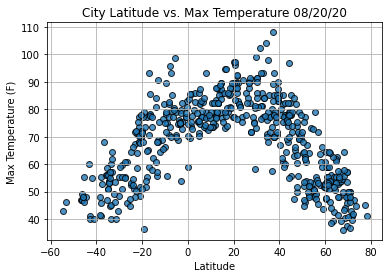

In [54]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolors='k', linewidths=1, alpha=0.8, label='Cities')

# Add a title, axes labels, and grid
plt.title('City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig1.png')

plt.show()

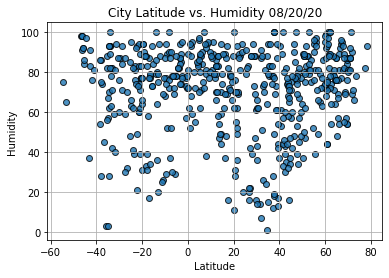

In [53]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolors='k', linewidths=1, alpha=0.8, label='Cities')

# Add a title, axes labels, and grid
plt.title('City Latitude vs. Humidity ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig2.png')

plt.show()

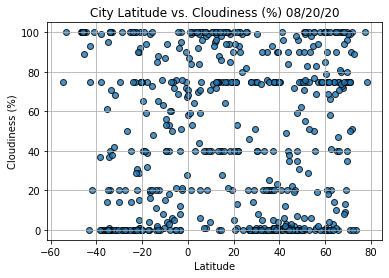

In [52]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolors='k', linewidths=1, alpha=0.8, label='Cities')

# Add a title, axes labels, and grid
plt.title('City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig3.png')

plt.show()

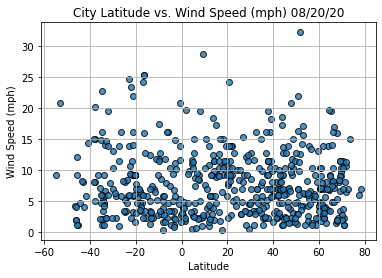

In [51]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolors='k', linewidths=1, alpha=0.8, label='Cities')

# Add a title, axes labels, and grid
plt.title('City Latitude vs. Wind Speed (mph) ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig4.png')

plt.show()


In [68]:
# Define a function that plots and annotates regression lines for weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Print the r value
    print(r_value)
    
    # Claculate the y values of the regression line
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    
    # Create a scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot and annotate the regression line
    plt.plot(x_values, regress_values, 'r')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='r')
    
    # Add a title, axes labels, and grid
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
        
    plt.show()


In [60]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Coquimbo,CL,2020-08-20 20:33:02,-29.95,-71.34,55.40,76,20,10.29
6,Mount Gambier,AU,2020-08-20 20:30:51,-37.83,140.77,41.00,86,75,8.05
8,Rikitea,PF,2020-08-20 20:35:51,-23.12,-134.97,67.37,81,100,24.63
14,Bluff,NZ,2020-08-20 20:35:53,-46.60,168.33,46.99,98,100,4.23
17,Noumea,NC,2020-08-20 20:35:54,-22.28,166.46,71.01,93,31,2.24


-0.7557434722079814


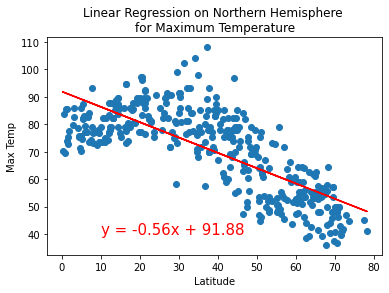

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(
    x_values, y_values,
    'Linear Regression on Northern Hemisphere \nfor Maximum Temperature',
    'Max Temp', (10, 40)
)

0.7457271023628419


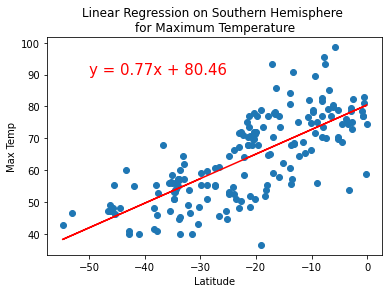

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(
    x_values, y_values,
    'Linear Regression on Southern Hemisphere \nfor Maximum Temperature',
    'Max Temp', (-50, 90)
)

0.07969144855488655


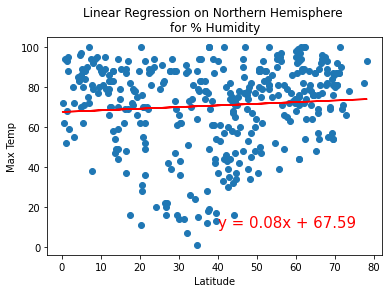

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(
    x_values, y_values,
    'Linear Regression on Northern Hemisphere \nfor % Humidity',
    '% Humidity', (40, 10)
)

-0.005393452732912815


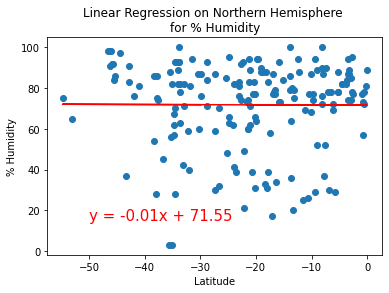

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(
    x_values, y_values,
    'Linear Regression on Northern Hemisphere \nfor % Humidity',
    '% Humidity', (-50, 15)
)

-0.12130354980124412


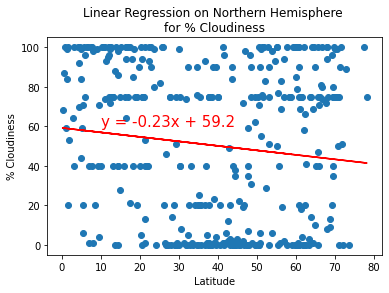

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(
    x_values, y_values,
    'Linear Regression on Northern Hemisphere \nfor % Cloudiness',
    '% Cloudiness', (10, 60)
)

-0.11008730652592878


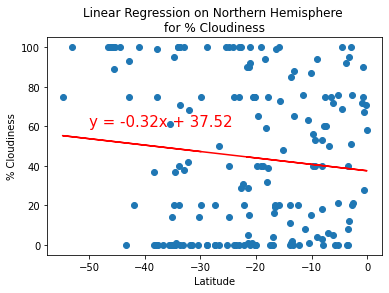

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(
    x_values, y_values,
    'Linear Regression on Northern Hemisphere \nfor % Cloudiness',
    '% Cloudiness', (-50, 60)
)

-0.02891037682584465


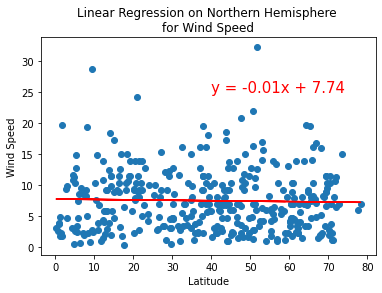

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(
    x_values, y_values,
    'Linear Regression on Northern Hemisphere \nfor Wind Speed',
    'Wind Speed', (40, 25)
)

-0.06833518607057533


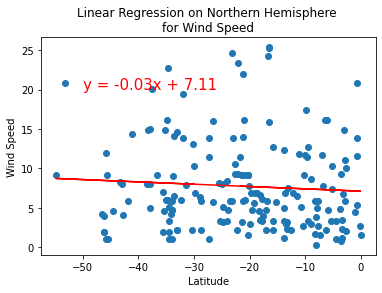

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(
    x_values, y_values,
    'Linear Regression on Northern Hemisphere \nfor Wind Speed',
    'Wind Speed', (-50, 20)
)